<a href="https://colab.research.google.com/github/duongsangts4-glitch/Scientific-Research-2024-2025/blob/main/Scientific_Research_2024_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Link tải nguồn dữ liệu có tên là "heart_2020_cleaned.csv": https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/data
from google.colab import files
uploaded = files.upload()

Saving heart_2020_cleaned.csv to heart_2020_cleaned (1).csv


In [3]:
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Dùng dòng này để lấy dữ liệu từ Drive
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv('/content/drive/MyDrive/26 11 24/heart_2020_cleaned.csv')


df = pd.read_csv('/content/heart_2020_cleaned.csv')

X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']
binary_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
                  'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
for col in binary_columns:
    df[col] = df[col].map({'No': 0, 'Yes': 1})

df['Sex'] = df['Sex'].map({'Female': 0, 'Male': 1})

age_mapping = {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3,
               '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7,
               '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or older': 12}
df['AgeCategory'] = df['AgeCategory'].map(age_mapping)

health_mapping = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}
df['GenHealth'] = df['GenHealth'].map(health_mapping)

df = pd.get_dummies(df, columns=['Race', 'Diabetic'], drop_first=True)

columns_to_clean = ["BMI", "PhysicalHealth", "SleepTime","MentalHealth"]

for col in columns_to_clean:
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_limit = df[col].quantile(0.25) - (1.5 * IQR)
    upper_limit = df[col].quantile(0.75) + (1.5 * IQR)
    df[col] = np.where(df[col] > upper_limit, upper_limit,
                       np.where(df[col] < lower_limit, lower_limit, df[col]))

X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']
oversample = SMOTE(sampling_strategy=0.9, random_state=42)
X_balanced, y_balanced = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Kiểm tra phân phối nhãn sau xử lý
print("Sau khi xử lý mất cân bằng (training data):")
print(pd.Series(y_train).value_counts())

Training base model: xgb


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:25:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:25:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:25:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:25:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training base model: lgbm
[LightGBM] [Info] Number of positive: 140338, number of negative: 155982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1091
[LightGBM] [Info] Number of data points in the train set: 296320, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473603 -> initscore=-0.105687
[LightGBM] [Info] Start training from score -0.105687


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 140338, number of negative: 155982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1091
[LightGBM] [Info] Number of data points in the train set: 296320, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473603 -> initscore=-0.105687
[LightGBM] [Info] Start training from score -0.105687


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 140338, number of negative: 155982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1091
[LightGBM] [Info] Number of data points in the train set: 296320, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473603 -> initscore=-0.105687
[LightGBM] [Info] Start training from score -0.105687


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 210507, number of negative: 233973
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.113312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1091
[LightGBM] [Info] Number of data points in the train set: 444480, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473603 -> initscore=-0.105687
[LightGBM] [Info] Start training from score -0.105687


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training base model: rf
Training base model: mlp
Accuracy: 0.9153265359383015

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92     58449
           1       0.91      0.91      0.91     52672

    accuracy                           0.92    111121
   macro avg       0.92      0.92      0.92    111121
weighted avg       0.92      0.92      0.92    111121


AUC Score: 0.9705064174660207


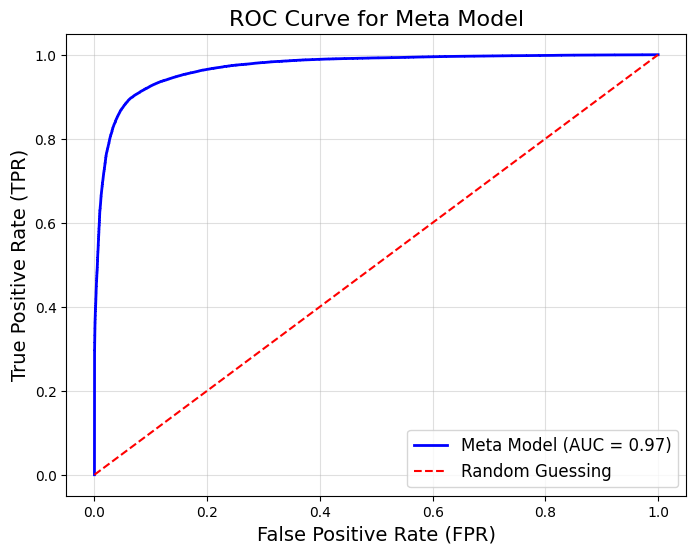

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt
# Khởi tạo các mô hình cơ sở
rf = RandomForestClassifier(random_state=42)
mlp = MLPClassifier(random_state=42)
lgbm= lgb.LGBMClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'      # Chọn hàm mục tiêu logloss
)

base_models = [
    ('xgb', xgb_model),
    ('lgbm', lgbm),
    ('rf', rf),
    ('mlp', mlp)
]

# K-fold Cross-validation
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Khởi tạo mảng để lưu kết quả
train_meta_features = np.zeros((X_train_scaled.shape[0], len(base_models)*2))  # 2 cột cho mỗi mô hình (lớp âm và lớp dương)
test_meta_features = np.zeros((X_test_scaled.shape[0], len(base_models)*2))  # 2 cột cho mỗi mô hình

# Đào tạo base models và tạo meta features
for i, (name, model) in enumerate(base_models):
    print(f"Training base model: {name}")

    # Dự đoán trên tập huấn luyện sử dụng cross-validation
    train_meta_features[:, 2*i:2*i+2] = cross_val_predict(
        model, X_train_scaled, y_train, cv=kf, method='predict_proba'
    )  # Lấy cả xác suất của lớp âm và lớp dương

    # Huấn luyện trên toàn bộ tập huấn luyện và dự đoán trên tập kiểm tra
    model.fit(X_train_scaled, y_train)
    test_meta_features[:, 2*i:2*i+2] = model.predict_proba(X_test_scaled)  # Lấy cả xác suất của lớp âm và lớp dương

# Kết hợp với dữ liệu ban đầu để tạo ra feature cho meta-model
X_train_meta = np.hstack((X_train_scaled, train_meta_features))
X_test_meta = np.hstack((X_test_scaled, test_meta_features))

# Huấn luyện meta-model (Logistic Regression)
meta_model = LogisticRegression(random_state=42)
# meta_model = KNeighborsClassifier()
# meta_model = DecisionTreeClassifier(random_state=42)
meta_model.fit(X_train_meta, y_train)

# Dự đoán và đánh giá trên tập kiểm tra
y_pred = meta_model.predict(X_test_meta)

# Đánh giá hiệu suất
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



# Dự đoán xác suất trên tập kiểm tra
y_prob = meta_model.predict_proba(X_test_meta)[:, 1]  # Lấy xác suất của lớp dương

# Tính ROC và AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # FPR và TPR
auc_score = roc_auc_score(y_test, y_prob)         # AUC

print("\nAUC Score:", auc_score)

# Vẽ đường cong ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Meta Model (AUC = {auc_score:.2f})", color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing')
plt.title("ROC Curve for Meta Model", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.show()


In [ ]:
import os
from openpyxl import load_workbook
import pandas as pd
from sklearn.metrics import precision_score, recall_score

# Chuẩn bị thông tin để thêm vào file Excel
model_name = "LogisticRegression Meta Model"
precision = f"{round(precision_score(y_test, y_pred, average='weighted') * 100, 2)}%"
recall = f"{round(recall_score(y_test, y_pred, average='weighted') * 100, 2)}%"
accuracy = f"{round(accuracy_score(y_test, y_pred) * 100, 2)}%"
auc = f"{round(auc_score * 100, 2)}%"

# Tạo DataFrame từ các kết quả
new_data = {
    "Model": [model_name],
    "Precision": [precision],
    "Recall": [recall],
    "Accuracy": [accuracy],
    "AUC": [auc]
}
new_data_df = pd.DataFrame(new_data)

# Đường dẫn tới file Excel
folder_path = '/content/drive/My Drive/26 11 24'
file_path = os.path.join(folder_path, 'classification_report.xlsx')

# Kiểm tra và thêm dữ liệu vào file Excel
if os.path.exists(file_path):
    with pd.ExcelWriter(file_path, mode='a', engine='openpyxl', if_sheet_exists='overlay') as writer:
        # Lấy vị trí dòng cuối cùng của sheet "Summary"
        summary_sheet = writer.sheets['Summary']
        start_row = summary_sheet.max_row  # Tìm dòng cuối cùng
        new_data_df.to_excel(writer, index=False, sheet_name="Summary", header=False, startrow=start_row)
else:
    # Nếu file không tồn tại, tạo file mới và thêm dữ liệu
    os.makedirs(folder_path, exist_ok=True)  # Tạo thư mục nếu chưa có
    with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
        new_data_df.to_excel(writer, index=False, sheet_name="Summary")

print(f"Kết quả mới đã được thêm vào file: {file_path}")


Kết quả mới đã được thêm vào file: /content/drive/My Drive/26 11 24/classification_report.xlsx


Training base model: xgb


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:46:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:46:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:46:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:46:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training base model: lgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 124783, number of negative: 155941
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1091
[LightGBM] [Info] Number of data points in the train set: 280724, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444504 -> initscore=-0.222902
[LightGBM] [Info] Start training from score -0.222902


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 124783, number of negative: 155942
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1091
[LightGBM] [Info] Number of data points in the train set: 280725, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444503 -> initscore=-0.222908
[LightGBM] [Info] Start training from score -0.222908


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 124784, number of negative: 155941
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1091
[LightGBM] [Info] Number of data points in the train set: 280725, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444506 -> initscore=-0.222893
[LightGBM] [Info] Start training from score -0.222893


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 187175, number of negative: 233912
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1091
[LightGBM] [Info] Number of data points in the train set: 421087, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444504 -> initscore=-0.222901
[LightGBM] [Info] Start training from score -0.222901


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training base model: rf
Training base model: mlp
Accuracy: 0.891946576487575

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     58510
           1       0.87      0.89      0.88     46762

    accuracy                           0.89    105272
   macro avg       0.89      0.89      0.89    105272
weighted avg       0.89      0.89      0.89    105272


AUC Score: 0.9434089262038423


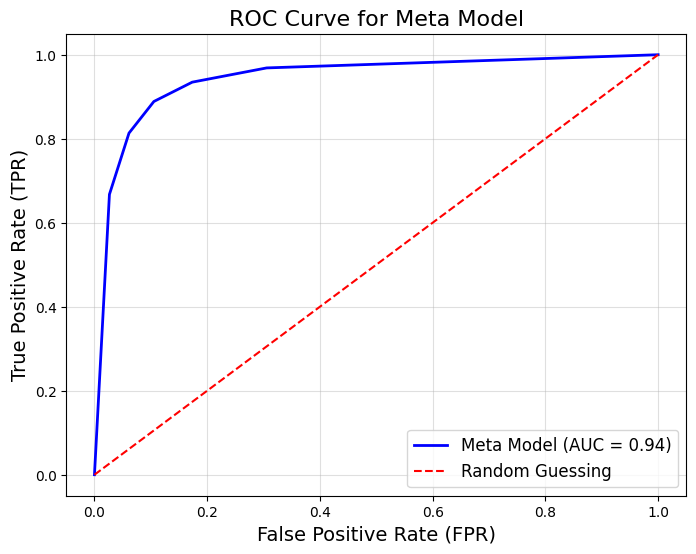

In [ ]:
# Khởi tạo các mô hình cơ sở
rf = RandomForestClassifier(random_state=42)
mlp = MLPClassifier(random_state=42)
lgbm= lgb.LGBMClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,   # Tắt label encoder
    eval_metric='logloss'      # Chọn hàm mục tiêu logloss
)

base_models = [
    ('xgb', xgb_model),
    ('lgbm', lgbm),
    ('rf', rf),
    ('mlp', mlp)
]

# K-fold Cross-validation
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Khởi tạo mảng để lưu kết quả
train_meta_features = np.zeros((X_train_scaled.shape[0], len(base_models)*2))  # 2 cột cho mỗi mô hình (lớp âm và lớp dương)
test_meta_features = np.zeros((X_test_scaled.shape[0], len(base_models)*2))  # 2 cột cho mỗi mô hình

# Đào tạo base models và tạo meta features
for i, (name, model) in enumerate(base_models):
    print(f"Training base model: {name}")

    # Dự đoán trên tập huấn luyện sử dụng cross-validation
    train_meta_features[:, 2*i:2*i+2] = cross_val_predict(
        model, X_train_scaled, y_train, cv=kf, method='predict_proba'
    )  # Lấy cả xác suất của lớp âm và lớp dương

    # Huấn luyện trên toàn bộ tập huấn luyện và dự đoán trên tập kiểm tra
    model.fit(X_train_scaled, y_train)
    test_meta_features[:, 2*i:2*i+2] = model.predict_proba(X_test_scaled)  # Lấy cả xác suất của lớp âm và lớp dương

# Kết hợp với dữ liệu ban đầu để tạo ra feature cho meta-model
X_train_meta = np.hstack((X_train_scaled, train_meta_features))  # Kết hợp dữ liệu huấn luyện với các meta-features
X_test_meta = np.hstack((X_test_scaled, test_meta_features))  # Kết hợp dữ liệu kiểm tra với các meta-features

# Huấn luyện meta-model (Logistic Regression)
# meta_model = LogisticRegression(random_state=42)
meta_model = KNeighborsClassifier()
# meta_model = DecisionTreeClassifier(random_state=42)
meta_model.fit(X_train_meta, y_train)

# Dự đoán và đánh giá trên tập kiểm tra
y_pred = meta_model.predict(X_test_meta)

# Đánh giá hiệu suất
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Dự đoán xác suất trên tập kiểm tra
y_prob = meta_model.predict_proba(X_test_meta)[:, 1]  # Lấy xác suất của lớp dương

# Tính ROC và AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # FPR và TPR
auc_score = roc_auc_score(y_test, y_prob)         # AUC

print("\nAUC Score:", auc_score)

# Vẽ đường cong ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Meta Model (AUC = {auc_score:.2f})", color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing')
plt.title("ROC Curve for Meta Model", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.show()


In [ ]:
import os
from openpyxl import load_workbook
import pandas as pd
from sklearn.metrics import precision_score, recall_score

# Chuẩn bị thông tin để thêm vào file Excel
model_name = "KNN Meta Model"
precision = f"{round(precision_score(y_test, y_pred, average='weighted') * 100, 2)}%"
recall = f"{round(recall_score(y_test, y_pred, average='weighted') * 100, 2)}%"
accuracy = f"{round(accuracy_score(y_test, y_pred) * 100, 2)}%"
auc = f"{round(auc_score * 100, 2)}%"

# Tạo DataFrame từ các kết quả
new_data = {
    "Model": [model_name],
    "Precision": [precision],
    "Recall": [recall],
    "Accuracy": [accuracy],
    "AUC": [auc]
}
new_data_df = pd.DataFrame(new_data)

# Đường dẫn tới file Excel
folder_path = '/content/drive/My Drive/26 11 24'
file_path = os.path.join(folder_path, 'classification_report.xlsx')

# Kiểm tra và thêm dữ liệu vào file Excel
if os.path.exists(file_path):
    with pd.ExcelWriter(file_path, mode='a', engine='openpyxl', if_sheet_exists='overlay') as writer:
        # Lấy vị trí dòng cuối cùng của sheet "Summary"
        summary_sheet = writer.sheets['Summary']
        start_row = summary_sheet.max_row  # Tìm dòng cuối cùng
        new_data_df.to_excel(writer, index=False, sheet_name="Summary", header=False, startrow=start_row)
else:
    # Nếu file không tồn tại, tạo file mới và thêm dữ liệu
    os.makedirs(folder_path, exist_ok=True)  # Tạo thư mục nếu chưa có
    with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
        new_data_df.to_excel(writer, index=False, sheet_name="Summary")

print(f"Kết quả mới đã được thêm vào file: {file_path}")


Kết quả mới đã được thêm vào file: /content/drive/My Drive/26 11 24/classification_report.xlsx


Training base model: xgb


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:20:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:20:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:20:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:20:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training base model: lgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 124783, number of negative: 155941
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1091
[LightGBM] [Info] Number of data points in the train set: 280724, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444504 -> initscore=-0.222902
[LightGBM] [Info] Start training from score -0.222902


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 124783, number of negative: 155942
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1091
[LightGBM] [Info] Number of data points in the train set: 280725, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444503 -> initscore=-0.222908
[LightGBM] [Info] Start training from score -0.222908


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 124784, number of negative: 155941
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1091
[LightGBM] [Info] Number of data points in the train set: 280725, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444506 -> initscore=-0.222893
[LightGBM] [Info] Start training from score -0.222893


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 187175, number of negative: 233912
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1091
[LightGBM] [Info] Number of data points in the train set: 421087, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444504 -> initscore=-0.222901
[LightGBM] [Info] Start training from score -0.222901


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training base model: rf
Training base model: mlp
Accuracy: 0.877165818071282

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89     58510
           1       0.86      0.86      0.86     46762

    accuracy                           0.88    105272
   macro avg       0.88      0.88      0.88    105272
weighted avg       0.88      0.88      0.88    105272


AUC Score: 0.8760273503872901


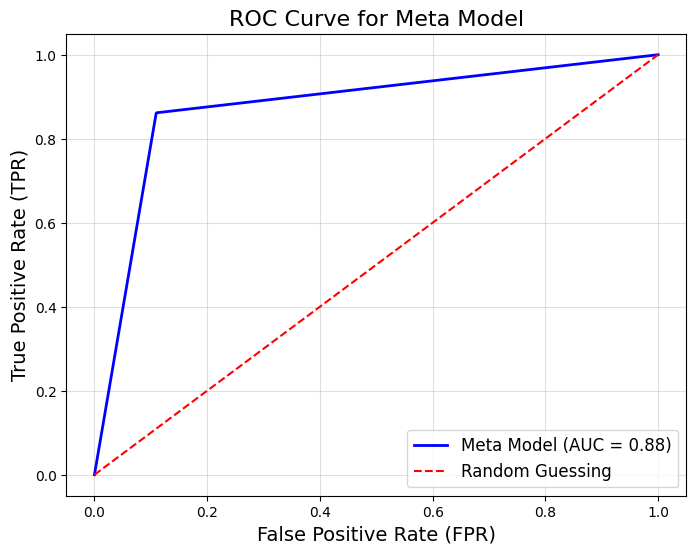

In [ ]:
# Khởi tạo các mô hình cơ sở
rf = RandomForestClassifier(random_state=42)
mlp = MLPClassifier(random_state=42)
lgbm= lgb.LGBMClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,   # Tắt label encoder
    eval_metric='logloss'      # Chọn hàm mục tiêu logloss
)

base_models = [
    ('xgb', xgb_model),
    ('lgbm', lgbm),
    ('rf', rf),
    ('mlp', mlp)
]

# K-fold Cross-validation
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Khởi tạo mảng để lưu kết quả
train_meta_features = np.zeros((X_train_scaled.shape[0], len(base_models)*2))  # 2 cột cho mỗi mô hình (lớp âm và lớp dương)
test_meta_features = np.zeros((X_test_scaled.shape[0], len(base_models)*2))  # 2 cột cho mỗi mô hình

# Đào tạo base models và tạo meta features
for i, (name, model) in enumerate(base_models):
    print(f"Training base model: {name}")

    # Dự đoán trên tập huấn luyện sử dụng cross-validation
    train_meta_features[:, 2*i:2*i+2] = cross_val_predict(
        model, X_train_scaled, y_train, cv=kf, method='predict_proba'
    )  # Lấy cả xác suất của lớp âm và lớp dương

    # Huấn luyện trên toàn bộ tập huấn luyện và dự đoán trên tập kiểm tra
    model.fit(X_train_scaled, y_train)
    test_meta_features[:, 2*i:2*i+2] = model.predict_proba(X_test_scaled)  # Lấy cả xác suất của lớp âm và lớp dương

# Kết hợp với dữ liệu ban đầu để tạo ra feature cho meta-model
X_train_meta = np.hstack((X_train_scaled, train_meta_features))  # Kết hợp dữ liệu huấn luyện với các meta-features
X_test_meta = np.hstack((X_test_scaled, test_meta_features))  # Kết hợp dữ liệu kiểm tra với các meta-features

# Huấn luyện meta-model (Logistic Regression)
# meta_model = LogisticRegression(random_state=42)
# meta_model = KNeighborsClassifier()
meta_model = DecisionTreeClassifier(random_state=42)
meta_model.fit(X_train_meta, y_train)

# Dự đoán và đánh giá trên tập kiểm tra
y_pred = meta_model.predict(X_test_meta)

# Đánh giá hiệu suất
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Dự đoán xác suất trên tập kiểm tra
y_prob = meta_model.predict_proba(X_test_meta)[:, 1]  # Lấy xác suất của lớp dương

# Tính ROC và AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # FPR và TPR
auc_score = roc_auc_score(y_test, y_prob)         # AUC

print("\nAUC Score:", auc_score)

# Vẽ đường cong ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Meta Model (AUC = {auc_score:.2f})", color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing')
plt.title("ROC Curve for Meta Model", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.show()


In [ ]:
import os
from openpyxl import load_workbook
import pandas as pd
from sklearn.metrics import precision_score, recall_score

# Chuẩn bị thông tin để thêm vào file Excel
model_name = "DecisionTree Meta Model"
precision = f"{round(precision_score(y_test, y_pred, average='weighted') * 100, 2)}%"
recall = f"{round(recall_score(y_test, y_pred, average='weighted') * 100, 2)}%"
accuracy = f"{round(accuracy_score(y_test, y_pred) * 100, 2)}%"
auc = f"{round(auc_score * 100, 2)}%"

# Tạo DataFrame từ các kết quả
new_data = {
    "Model": [model_name],
    "Precision": [precision],
    "Recall": [recall],
    "Accuracy": [accuracy],
    "AUC": [auc]
}
new_data_df = pd.DataFrame(new_data)

# Đường dẫn tới file Excel
folder_path = '/content/drive/My Drive/26 11 24'
file_path = os.path.join(folder_path, 'classification_report.xlsx')

# Kiểm tra và thêm dữ liệu vào file Excel
if os.path.exists(file_path):
    with pd.ExcelWriter(file_path, mode='a', engine='openpyxl', if_sheet_exists='overlay') as writer:
        # Lấy vị trí dòng cuối cùng của sheet "Summary"
        summary_sheet = writer.sheets['Summary']
        start_row = summary_sheet.max_row  # Tìm dòng cuối cùng
        new_data_df.to_excel(writer, index=False, sheet_name="Summary", header=False, startrow=start_row)
else:
    # Nếu file không tồn tại, tạo file mới và thêm dữ liệu
    os.makedirs(folder_path, exist_ok=True)  # Tạo thư mục nếu chưa có
    with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
        new_data_df.to_excel(writer, index=False, sheet_name="Summary")

print(f"Kết quả mới đã được thêm vào file: {file_path}")


Kết quả mới đã được thêm vào file: /content/drive/My Drive/26 11 24/classification_report.xlsx
